In [30]:
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

In [31]:
with open('data_err_tested_0625_N_test10.txt','rb') as f:
    data_dict = pickle.load(f)  
    
result_trainloss_set, result_L2_trainloss_set, result_testacc_set = data_dict['result_trainloss_set'], data_dict['result_L2_trainloss_set'],data_dict['result_testacc_set']


In [32]:
def smooth_loss(loss_array, window_size=3):
    """
    Smooths out a 1D array of loss values by replacing each value with the mean
    of itself and its neighbors, within a given window size.
    
    Args:
        loss_array (list or numpy array): 1D array of loss values to be smoothed
        window_size (int): Size of the window for computing the mean, default is 3
        
    Returns:
        smoothed_loss (numpy array): 1D array of smoothed loss values
    """
    if window_size == 0:
        return loss_array
    
    # Pad the array with zeros on either end to handle edge cases
    padded_loss = np.pad(loss_array, (window_size//2, window_size//2), mode='edge')
    
    # Compute the rolling mean of the padded array
    smoothed_loss = np.convolve(padded_loss, np.ones(window_size)/window_size, mode='valid')
    
    return smoothed_loss

In [33]:
lr = 0.02

In [34]:
cm = plt.cm.YlGnBu

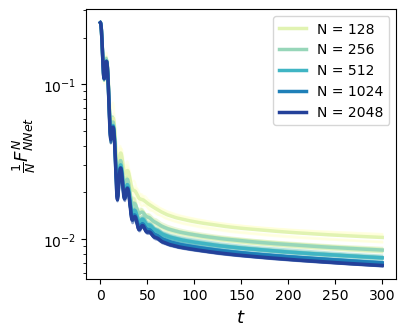

In [38]:
# log 2 loss versus interation numbers, different test var, restore the test info at first

# test_var = 'c_cutoff'
# test_values = [1,2,5,10,20]

# test_var = 'particle_num'
# try:
#     print(test_values)
# except:
#     test_values = [32,64,128,256,512]

# test_var = 'momentum'
# test_values = [True, False]
# lr = 0.01
# test_values = [32,64,128,256,512,1024,2048]

test_var = 'particle_num'
test_values = [128,256,512,1024,2048]

log_wise_step = False
log_wise_loss = False
minus_minimum = False
time_xaxis = True

# colors = sns.color_palette("Paired")[1:len(test_values)+1]
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['medium green'], sns.xkcd_rgb['denim blue'],'purple',sns.xkcd_rgb['orange'],'yellow','black','brown','C1']


plot_idx = 0

fig = plt.figure(figsize=(4,3.5))

if plot_idx == 0:
    ax1 = fig.add_subplot(111)
    ax2 = None
else:
    ax1 = None
    ax2 = fig.add_subplot(111)

axs = [ax1,ax2]
labels =  ['\\frac{1}{N}F_{NNet}^N', '\\frac{1}{N}F_{NNet}^N + \\frac{1}{N}F_{Kinet}^N']
losses_set = [result_trainloss_set,result_L2_trainloss_set]
disvisible_index = []

for idx, losses in enumerate(losses_set):
    if idx != plot_idx:
        continue
        
    ax = axs[idx]
    eps = 1e-4
    smooth_window_size = 1

    for idx_ in range(len(test_values)):
        if idx_ in disvisible_index:
            continue
        I = np.array(losses[idx_]).shape[-1]
        obser_end = int(I * 1) 
        # obser_end = 200
        
        xplot_set = np.arange(I) if log_wise_loss else np.arange(I-1)
    
        globals()[test_var] = test_values[idx_]
        
        if time_xaxis == False:
            lr = 1

        xplot_set = np.log2(np.arange(1,I+1)) if log_wise_step else np.arange(I)

        for pending_list in losses[idx_]:

            yplot_set = smooth_loss(pending_list, window_size  = smooth_window_size)
            yplot_set = np.log10(yplot_set - min(yplot_set) + eps) if minus_minimum else yplot_set# np.log10(yplot_set)
            
            ax.plot(xplot_set[:obser_end]*lr,yplot_set[:obser_end],c=cm(idx_/len(test_values)),alpha=0.5,zorder = -111)
        
        yplot_set = np.mean(losses[idx_],axis=0)
        yplot_set = smooth_loss(yplot_set, window_size  = smooth_window_size)
        yplot_set = np.log10(yplot_set - min(yplot_set) + eps) if minus_minimum else yplot_set # else np.log10(yplot_set)

        ax.plot(xplot_set[:obser_end]* lr,yplot_set[:obser_end],linewidth = 2.5,
                 zorder = idx_,c=cm((1+idx_)/(1+len(test_values))),label='N = %d'%(test_values[idx_]))
        
        
    ax.legend(loc = 'upper right',ncol=1)
#     ax.set_ylim(-2,-1)
    ax.set_xlabel('$log_{10} (Step)$') if log_wise_step else plt.xlabel('$t$',fontsize=13)
    # ax.set_ylabel('$log_{10} (%s)$'%(labels[idx]),fontsize=13) 
    ax.set_ylabel('$ %s$'%(labels[idx]),fontsize=13) 
    ax.set_yscale('log')
    
plt.savefig('MNIST_paths_withoutl2.png', bbox_inches='tight')
plt.show()



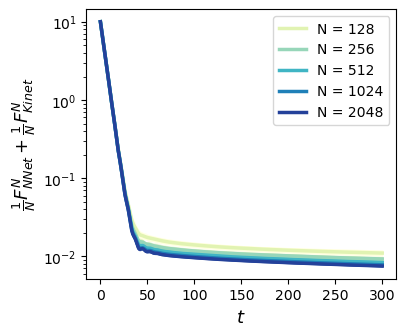

In [44]:
# log 2 loss versus interation numbers, different test var, restore the test info at first

# test_var = 'c_cutoff'
# test_values = [1,2,5,10,20]

# test_var = 'particle_num'
# try:
#     print(test_values)
# except:
#     test_values = [32,64,128,256,512]

# test_var = 'momentum'
# test_values = [True, False]
# lr = 0.01
# test_values = [32,64,128,256,512,1024,2048]

test_var = 'particle_num'
# test_values = [32,64,128,256,512,1024]

log_wise_step = False
log_wise_loss = False
minus_minimum = False
time_xaxis = True

# colors = sns.color_palette("Paired")[1:len(test_values)+1]
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['medium green'], sns.xkcd_rgb['denim blue'],'purple',sns.xkcd_rgb['orange'],'yellow','black','brown','C1']


plot_idx = 1

fig = plt.figure(figsize=(4,3.5))

if plot_idx == 0:
    ax1 = fig.add_subplot(111)
    ax2 = None
else:
    ax1 = None
    ax2 = fig.add_subplot(111)

axs = [ax1,ax2]
labels =  ['\\frac{1}{N}F_{NNet}^N', '\\frac{1}{N}F_{NNet}^N + \\frac{1}{N}F_{Kinet}^N']
losses_set = [result_trainloss_set,result_L2_trainloss_set]
disvisible_index = []

for idx, losses in enumerate(losses_set):
    if idx != plot_idx:
        continue
        
    ax = axs[idx]
    eps = 1e-4
    smooth_window_size = 1

    for idx_ in range(len(test_values)):
        if idx_ in disvisible_index:
            continue
        I = np.array(losses[idx_]).shape[-1]
        obser_end = int(I * 1) 
        # obser_end = 200
        
        xplot_set = np.arange(I) if log_wise_loss else np.arange(I-1)
    
        globals()[test_var] = test_values[idx_]
        
        if time_xaxis == False:
            lr = 1

        xplot_set = np.log2(np.arange(1,I+1)) if log_wise_step else np.arange(I)

        for pending_list in losses[idx_]:

            yplot_set = smooth_loss(pending_list, window_size  = smooth_window_size)
            yplot_set = np.log10(yplot_set - min(yplot_set) + eps) if minus_minimum else yplot_set# np.log10(yplot_set)
            
            ax.plot(xplot_set[:obser_end]*lr,yplot_set[:obser_end],c=cm(idx_/len(test_values)),alpha=0.5,zorder = -111)
        
        yplot_set = np.mean(losses[idx_],axis=0)
        yplot_set = smooth_loss(yplot_set, window_size  = smooth_window_size)
        yplot_set = np.log10(yplot_set - min(yplot_set) + eps) if minus_minimum else yplot_set # else np.log10(yplot_set)

        ax.plot(xplot_set[:obser_end]* lr,yplot_set[:obser_end],linewidth = 2.5,
                 zorder = idx_,c=cm((1+idx_)/(1+len(test_values))),label='N = %d'%(test_values[idx_]))
        
        
    ax.legend(loc = 'upper right',ncol=1)
#     ax.set_ylim(-2,-1)
    ax.set_xlabel('$log_{10} (Step)$') if log_wise_step else plt.xlabel('$t$',fontsize=13)
    # ax.set_ylabel('$log_{10} (%s)$'%(labels[idx]),fontsize=13) 
    ax.set_ylabel('$ %s$'%(labels[idx]),fontsize=13) 
    ax.set_yscale('log')
    
plt.savefig('MNIST_paths_withl2.png', bbox_inches='tight')
plt.show()



In [41]:
test_values = [128,256,512,1024,2048]

trained_losses = []
L2_trained_losses = []

for idx, test_vulue in enumerate(test_values):
    trained_losses_current = []
    L2_trained_losses_current = []
    
    for test_number in range(len(result_trainloss_set[idx])):
        trained_losses_current.append(np.mean(result_trainloss_set[idx][test_number][-500:]))
        L2_trained_losses_current.append(np.mean(result_L2_trainloss_set[idx][test_number][-500:]))
        
    trained_losses.append(trained_losses_current)
    L2_trained_losses.append(L2_trained_losses_current)

In [42]:
test_time_per_objective = len(trained_losses_current)

try:
    print(test_values)
except:
    test_values = [128,256,512,1024,2048]

test_values = [128,256,512,1024,2048]
test_values = np.array(test_values)
all_data = (np.ones([test_time_per_objective,1]) * test_values).T.reshape(-1)
trained_losses = np.array(trained_losses)
L2_trained_losses =  np.array(L2_trained_losses)

model = linear_model.LinearRegression()
alpha = -1.0

model.fit(all_data.reshape(-1,1)**(alpha), trained_losses.reshape(-1))
w = model.coef_[0]
b = model.intercept_

model = linear_model.LinearRegression()
alpha_l2 = -1.0
          
model.fit(all_data.reshape(-1,1)**(alpha_l2), L2_trained_losses.reshape(-1))
w_l2 = model.coef_[0]
b_l2 = model.intercept_


[128, 256, 512, 1024, 2048]


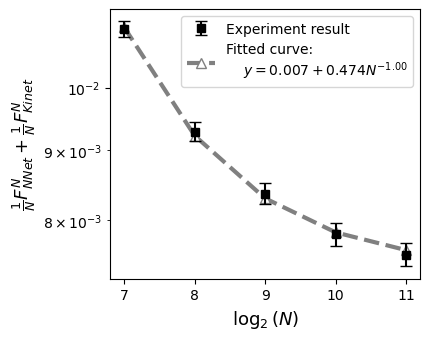

In [43]:
# log 2 terminal loss versus different test var

# test_var = 'c_cutoff'
# test_values = [1,2,5,10,20]

fig = plt.figure(figsize=(4,3.5))

plot_idx = 1
if plot_idx == 0:
    ax1 = fig.add_subplot(111)
    ax2 = None
else:
    ax1 = None
    ax2 = fig.add_subplot(111)

test_values = np.array(test_values)

axs = [ax1,ax2]
labels =  ['\\frac{1}{N}F_{NNet}^N', '\\frac{1}{N}F_{NNet}^N + \\frac{1}{N}F_{Kinet}^N']
ws = [w, w_l2]
bs = [b, b_l2]
alphas = [alpha, alpha_l2]
logwise_loss = True


for idx, trained_losses_data in enumerate([trained_losses, L2_trained_losses]):
    if idx != plot_idx:
        continue
        
    ax = axs[idx]
    w_plot = ws[idx]
    b_plot = bs[idx]
    alpha_plot = alphas[idx]
    
    avg_trained_loss_vec = np.mean(trained_losses_data,axis=1)
    std_trained_loss_vec = np.std(trained_losses_data,axis=1)

    all_data = (np.ones([test_time_per_objective,1]) * test_values).T.reshape(-1)
    
    xplot = np.log2(test_values.reshape(-1).copy() )
    yplot =  avg_trained_loss_vec.copy()
    yplot_predict = b_plot + w_plot * test_values.reshape(-1) ** (alpha_plot)
    
    # ax.errorbar(xplot,yplot,std_trained_loss_vec.std(),color='red', ls='', marker='o', capsize=5, capthick=1, ecolor='black',label='Experiment result')
    ax.errorbar(xplot,yplot,std_trained_loss_vec.std(), zorder=50,ls='',color='k', marker='s', capsize=4, capthick=1, ecolor='black',label='Experiment result')
    # ax.scatter(xplot,yplot,c='k',s=18,marker='s',zorder=100)
    ax.plot(xplot, yplot_predict,'--', marker='^',lw=3,markersize=7, c= 'grey',markerfacecolor='white',markeredgecolor='grey',label='Fitted curve: \n    $y= %.3f + %.3f N^{%.2f}$'%(b_plot,w_plot,alpha_plot),alpha=1)
    handles_temp, labels_temp = plt.gca().get_legend_handles_labels()
    order = [1, 0]  # New order of legend items
    plt.legend([handles_temp[idx] for idx in order], [labels_temp[idx] for idx in order])

#     handles, labels = plt.gca().get_legend_handles_labels()
#     order = [0, 1]  # New order of legend items
#     plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

    ax.set_yscale('log')
#     ax.set_ylim(0.01,0.4)
#     ax.legend()
    
    if logwise_loss:
        ax.set_xlabel('$\log_2 (N)$',fontsize=13)
        ax.set_ylabel('$%s$'%(labels[idx]),fontsize=13) 
    else:
        ax.set_xlabel('$N$')
        ax.set_ylabel('$%s$'%(labels[idx])) 
        
plt.savefig('Trainedl2loss.png', bbox_inches='tight')
plt.show()
